In [2]:
import json
import pandas as pd
from scipy.stats import mannwhitneyu

In [4]:
blast_path = "../test/BLAST/results/blast_family_metrics.json"
model_path = "../test/results/2ndvoting/k3/roc_data_k3.json"

with open(blast_path, "r") as f:
    blast_data = json.load(f)
with open(model_path, "r") as f:
    model_data = json.load(f)
    
blast_df = pd.DataFrame.from_dict(blast_data, orient="index")[["f1", "accuracy"]]
model_df = pd.DataFrame.from_dict(model_data, orient="index")[["f1", "accuracy"]]

blast_df.columns = ["Blast_f1", "Blast_accuracy"]
model_df.columns = ["MegaPlanTF_f1", "MegaPlanTF_accuracy"]


In [12]:
# Align both dataframes by family names (intersection)
common_families = blast_df.index.intersection(model_df.index)
blast_df = blast_df.loc[common_families]
model_df = model_df.loc[common_families]

comparison_df = pd.concat([blast_df, model_df], axis=1)
comparison_df.head(10)

,Blast_f1,Blast_accuracy,MegaPlanTF_f1,MegaPlanTF_accuracy
EIL,1.000000,1.000000,0.971193,0.999782
S1Fa-like,0.979021,0.999953,0.993103,0.999984
Whirly,0.995261,0.999984,0.995305,0.999984
ERF,0.975889,0.996848,0.995754,0.999438
TALE,0.973699,0.999267,0.993251,0.999813
SBP,1.000000,1.000000,0.992164,0.999797
HB-PHD,0.928962,0.999797,0.994764,0.999984
GRF,1.000000,1.000000,1.000000,1.000000
LBD,0.995475,0.999797,0.996185,0.999828
C3H,0.991971,0.999516,0.997679,0.999860


In [8]:
# Perform Mann–Whitney U test
u_stat_f1, p_val_f1 = mannwhitneyu(comparison_df["MegaPlanTF_f1"], comparison_df["Blast_f1"], alternative="greater")
u_stat_acc, p_val_acc = mannwhitneyu(comparison_df["MegaPlanTF_accuracy"], comparison_df["Blast_accuracy"], alternative="greater")

print("Mann–Whitney U test (F1-score):")
print(f"U-statistic = {u_stat_f1:.3f}, p-value = {p_val_f1:.4e}")

print("\nMann–Whitney U test (Accuracy):")
print(f"U-statistic = {u_stat_acc:.3f}, p-value = {p_val_acc:.4e}")

Mann–Whitney U test (F1-score):
U-statistic = 1857.500, p-value = 1.6657e-01

Mann–Whitney U test (Accuracy):
U-statistic = 1822.500, p-value = 2.1911e-01


In [10]:
summary = pd.DataFrame({
    "Metric": ["F1-score", "Accuracy"],
    "Mean (Model)": [comparison_df["MegaPlanTF_f1"].mean(), comparison_df["MegaPlanTF_accuracy"].mean()],
    "Mean (BLAST)": [comparison_df["Blast_f1"].mean(), comparison_df["Blast_accuracy"].mean()],
    "U-statistic": [u_stat_f1, u_stat_acc],
    "p-value": [p_val_f1, p_val_acc]
})
print(summary)

     Metric  Mean (Model)  Mean (BLAST)  U-statistic   p-value
0  F1-score      0.992518      0.974141       1857.5  0.166569
1  Accuracy      0.999755      0.999007       1822.5  0.219110


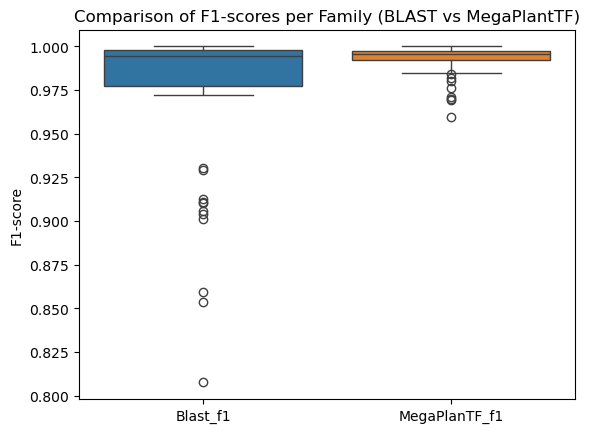

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=comparison_df[["Blast_f1", "MegaPlanTF_f1"]])
plt.title("Comparison of F1-scores per Family (BLAST vs MegaPlantTF)")
plt.ylabel("F1-score")
plt.show()
